In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate


In [14]:
df = pd.read_csv("weatherHistory.csv")
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df = df.select_dtypes(include=['float64','int64'])
df.drop(['Loud Cover'], axis=1, inplace=True)

In [25]:
data = df.drop('Temperature (C)', axis=1)
prediction = df['Temperature (C)']


X_train, X_test, y_train, y_test = train_test_split(data, prediction, test_size=0.2, random_state=0)

regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Ada Boosting': AdaBoostRegressor()
}

results = []

for name , reg in regressors.items():
  reg.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results.append([name, mse, r2])

h = ['Algorithm', 'mean squared error', 'r^2']

print(tabulate(results, headers=h,tablefmt='grid'))

+-------------------+----------------------+----------+
| Algorithm         |   mean squared error |      r^2 |
+===================+======================+==========+
| Linear Regression |           0.899982   | 0.990166 |
+-------------------+----------------------+----------+
| Decision Tree     |           0.00615418 | 0.999933 |
+-------------------+----------------------+----------+
| KNN               |           0.907108   | 0.990088 |
+-------------------+----------------------+----------+
| Random Forest     |           0.00225765 | 0.999975 |
+-------------------+----------------------+----------+
| Gradient Boosting |           0.0373569  | 0.999592 |
+-------------------+----------------------+----------+
| Ada Boosting      |           1.0293     | 0.988753 |
+-------------------+----------------------+----------+


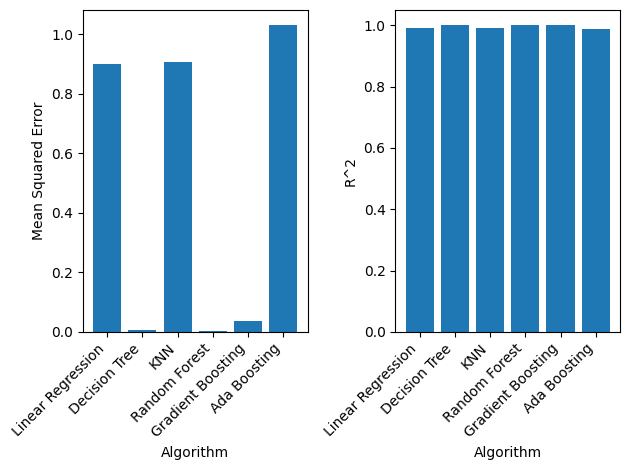

In [41]:
plt.subplot(1, 2, 1)
plt.bar([result[0] for result in results],[result[1] for result in results])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error')


plt.subplot(1, 2, 2)
plt.bar([result[0] for result in results],[result[2] for result in results])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Algorithm')
plt.ylabel('R^2')

plt.tight_layout()

plt.show()

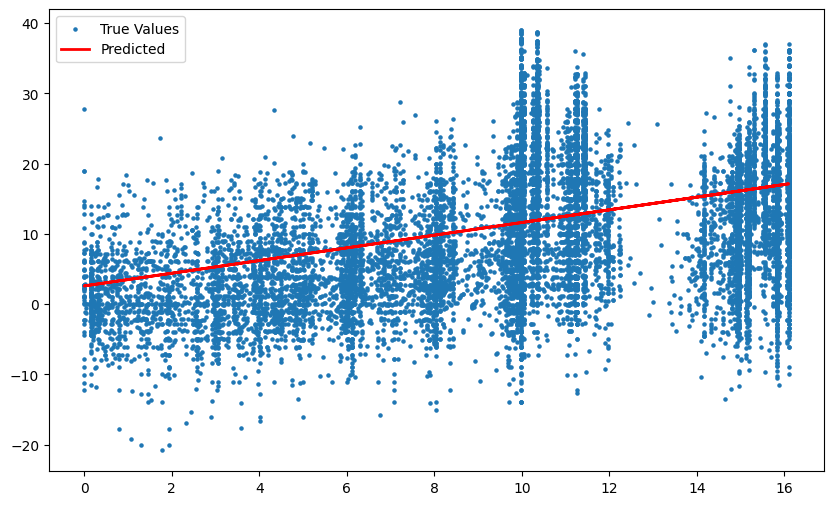

In [58]:
model = LinearRegression()

X = df[['Visibility (km)']]
y = df['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='True Values', s=5)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.legend()

. What type of machine learning problem is this?
It's supervised regression machine learning as it is forcasting the weather

What are the steps involved in preprocessing the
dataset for machine learning?
Removal of duplicate and non existing values, filtering the numeric values only.

How do we select the best model for our dataset?
The best model has the lowest Mean Squared Error and the highest R^2 Score.